# Importing data

Importing and checking that everything loaded ok.

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('../../#data-sets/titanic-train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyzing the columns

## Univariate analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.dropna().describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [8]:
df.select_dtypes(include=['object']).dropna().describe()

,Name,Sex,Ticket,Cabin,Embarked
count,202,202,202,202,202
unique,202,2,141,146,3
top,"Futrelle, Mr. Jacques Heath",male,19950,C23 C25 C27,S
freq,1,107,4,4,129


### Survived

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Class

In [10]:
df['Pclass'].value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

### Name / Title

We will extract titles from the `name` column, and create a new column with them.

*This idea has been seen and borrowed from [SadatNazrul](https://www.kaggle.com/creepykoala) and [his notebook](https://www.kaggle.com/creepykoala/titanic/study-of-tree-and-forest-algorithms).*

In [11]:
Title_Dictionary = {
                    "Capt":       "Officer", 
                    "Col":        "Officer",
                    "Major":      "Officer", 
                    "Jonkheer":   "Royalty", 
                    "Don":        "Royalty", 
                    "Sir" :       "Royalty", 
                    "Dr":         "Officer",
                    "Rev":        "Officer", 
                    "the Countess":"Royalty", 
                    "Dona":       "Royalty", 
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty" 
                    } 

df['Title'] = df['Name'].apply(lambda x: Title_Dictionary[x.split(',')[1].split('.')[0].strip()])

### Age

**Lots of missing values!!**

In [12]:
df['Age'].value_counts(dropna=False)[:20]

NaN      177
 24.0     30
 22.0     27
 18.0     26
 30.0     25
 19.0     25
 28.0     25
 21.0     24
 25.0     23
 36.0     22
 29.0     20
 35.0     18
 32.0     18
 26.0     18
 27.0     18
 16.0     17
 31.0     17
 23.0     15
 33.0     15
 34.0     15
 20.0     15
Name: Age, dtype: int64

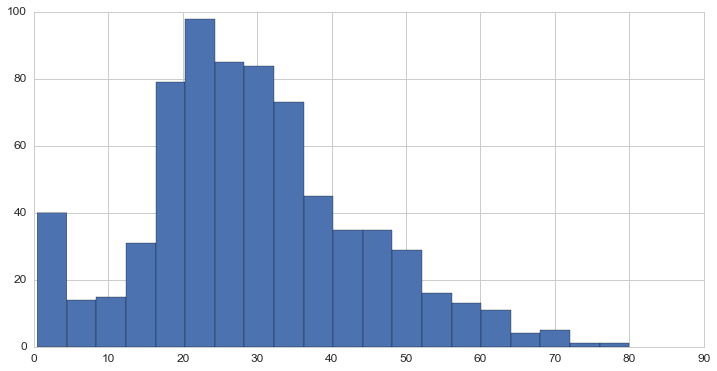

In [13]:
df['Age'].hist(bins=20)

### Siblings

In [14]:
df['SibSp'].value_counts(sort=False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

### Parents / childs

In [15]:
df['Parch'].value_counts(sort=False)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

### Fare

In [16]:
df['Fare'].value_counts().head(20)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
26.5500    15
7.2292     15
0.0000     15
7.2500     13
7.8542     13
8.6625     13
7.2250     12
9.5000      9
16.1000     9
24.1500     8
15.5000     8
56.4958     7
Name: Fare, dtype: int64

### Gender

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Ticket

In [18]:
df['Ticket'].value_counts()[:20]

1601            7
CA. 2343        7
347082          7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
382652          5
113760          4
113781          4
PC 17757        4
W./C. 6608      4
17421           4
349909          4
2666            4
4133            4
347077          4
19950           4
LINE            4
C.A. 34651      3
Name: Ticket, dtype: int64

### Cabin

**Lots of missing values!!**

In [19]:
df['Cabin'].value_counts(dropna=False)[:20]

NaN            687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
C22 C26          3
E101             3
D                3
F33              3
C123             2
B77              2
D17              2
C92              2
D26              2
E25              2
E44              2
C68              2
C78              2
D36              2
E8               2
Name: Cabin, dtype: int64

### Embarked

In [20]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Large majority of people embarked in Southampton, so we'll put `'S'` for those two missing values:

In [21]:
df['Embarked'].fillna('S', inplace=True)

## Multivariate analysis

### Survival rate between sexes and classes

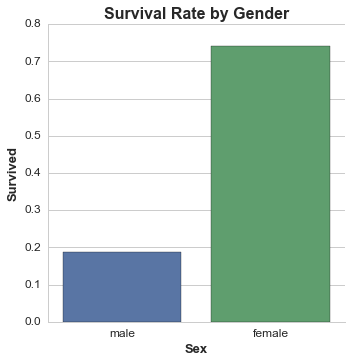

In [22]:
sns.factorplot(x='Sex', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Gender')

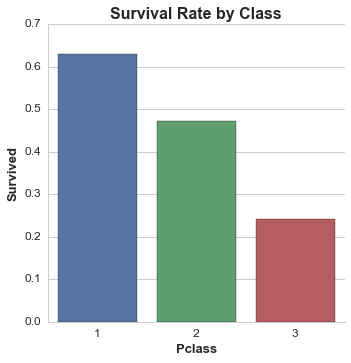

In [23]:
sns.factorplot(x='Pclass', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Class')

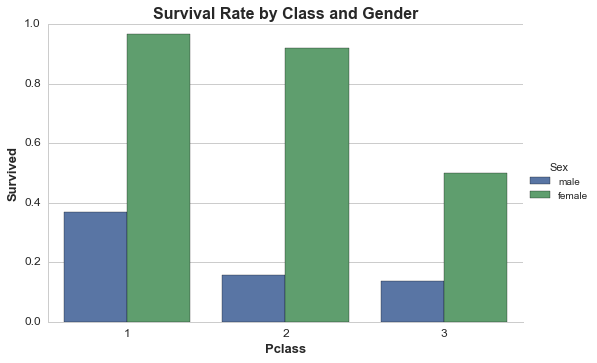

In [24]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', size=5, aspect=1.5, ci=None)
plt.title('Survival Rate by Class and Gender')

### Survival rate by age

Before we start dealing with the `age` column, we will fill missing values with the best value\* of each passengers group. The group is defined as people of the same *gender* in the same *class* having the same *title*.

\* best value = within one standard deviation of group's mean

In [25]:
ages_mean = df.pivot_table('Age', index=['Title'], columns=['Sex', 'Pclass'], aggfunc='mean')
ages_mean

Sex         female                             male                      
Pclass           1          2          3          1          2          3
Title                                                                    
Master         NaN        NaN        NaN   5.306667   2.258889   5.350833
Miss     29.744681  22.390625  16.123188        NaN        NaN        NaN
Mr             NaN        NaN        NaN  41.580460  32.768293  28.724891
Mrs      40.400000  33.547619  33.515152        NaN        NaN        NaN
Officer  49.000000        NaN        NaN  51.125000  42.000000        NaN
Royalty  40.500000        NaN        NaN  42.333333        NaN        NaN

In [26]:
ages_std = df.pivot_table('Age', index=['Title'], columns=['Sex', 'Pclass'], aggfunc='std')
ages_std

Sex         female                             male                      
Pclass           1          2          3          1          2          3
Title                                                                    
Master         NaN        NaN        NaN   5.165475   2.342634   3.593608
Miss     12.629276  13.374708   9.697315        NaN        NaN        NaN
Mr             NaN        NaN        NaN  14.148275  11.850977  10.490946
Mrs      12.779119  10.229566  10.031579        NaN        NaN        NaN
Officer        NaN        NaN        NaN  11.432254  14.020393        NaN
Royalty  10.606602        NaN        NaN   5.859465        NaN        NaN

In [27]:
def age_guesser(person):
    gender = person['Sex']
    mean_age = ages_mean[gender].loc[person['Title'], person['Pclass']]
    std = ages_std[gender].loc[person['Title'], person['Pclass']]
    persons_age = np.random.randint(mean_age - std, mean_age + std)
    return persons_age

unknown_age = df['Age'].isnull()
people_w_unknown_age = df.loc[unknown_age, ["Age", "Title", "Sex", "Pclass"]]

people_w_unknown_age['Age'] = people_w_unknown_age.apply(age_guesser, axis=1)

Now we can create a new column `new_age` with ages for all passengers.

In [28]:
known_age = df['Age'].notnull()
people_w_known_age = df.loc[known_age, ["Age", "Title", "Sex", "Pclass"]]

df['new_age'] = pd.concat([people_w_known_age['Age'], people_w_unknown_age['Age']])
df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,new_age
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,35.0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,30.0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,54.0


Let's compare distributions of age densities in different classes, before and after filling the missing values.

(0, 0.05)

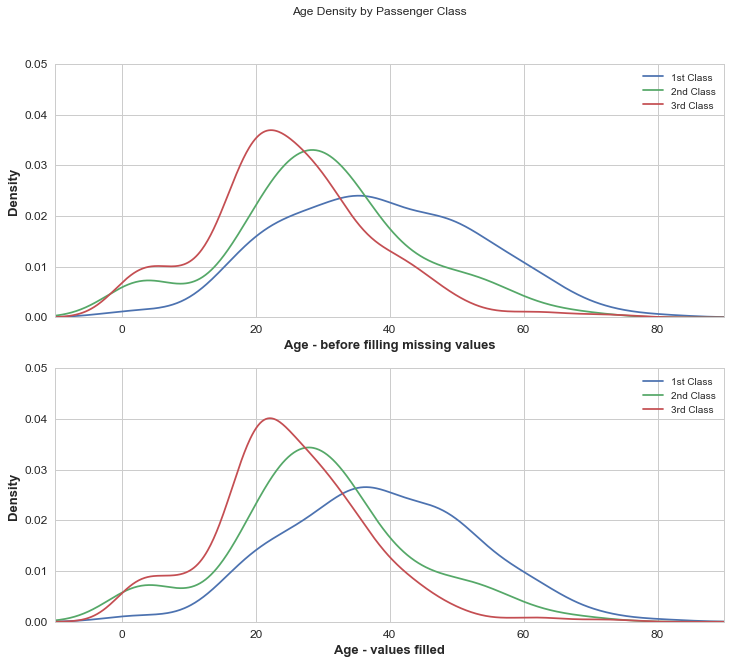

In [29]:
for pclass in [1, 2, 3]:
    plt.subplot(211)
    df[df['Pclass'] == pclass]['Age'].plot.kde(figsize=(12,10))
    plt.subplot(212)
    df[df['Pclass'] == pclass]['new_age'].plot.kde()
plt.suptitle('Age Density by Passenger Class', size=12)

plt.subplot(211)
plt.xlabel('Age - before filling missing values')
plt.legend(('1st Class', '2nd Class', '3rd Class'))
plt.xlim(-10,90)
plt.ylim(0, 0.05)

plt.subplot(212)
plt.xlabel('Age - values filled')
plt.legend(('1st Class', '2nd Class', '3rd Class'))
plt.xlim(-10,90)
plt.ylim(0, 0.05)

We'll use `new_age` for further analysis.

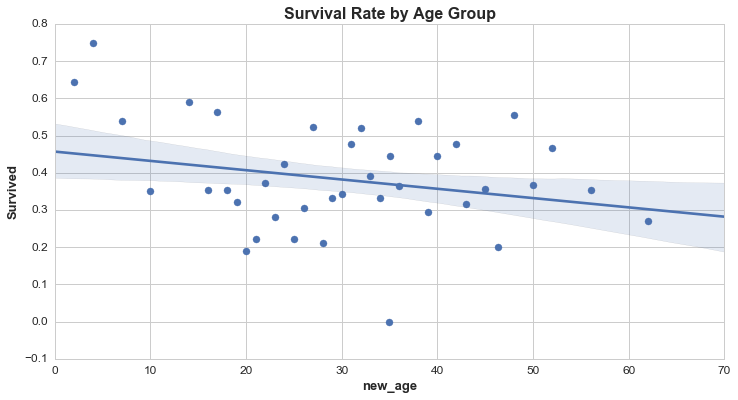

In [30]:
sns.regplot(x='new_age', y='Survived', data=df, x_bins=50, x_ci=None)
plt.xlim(0, None)
plt.title('Survival Rate by Age Group')

### Family on Titanic

Column `parent` will have people who have children on the ship. Similarly, `child` will have children (age less than 18) who have parents on the ship.

We'll also combine two columns: `SibSp` and `Parch`, and categorize passengers based on having any family member on the ship.

In [31]:
df['parent'] = 0
df.loc[(df.Parch > 0) & (df.new_age >= 18), 'parent'] = 1

df['child'] = 0
df.loc[(df.Parch > 0) & (df.new_age < 18), 'child'] = 1

df.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,new_age,parent,child
PassengerId,,,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Officer,27.0,0,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss,19.0,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,8.0,0,1
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,26.0,0,0
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr,32.0,0,0


In [32]:
df['family'] = df['SibSp'] + df['Parch']
df['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

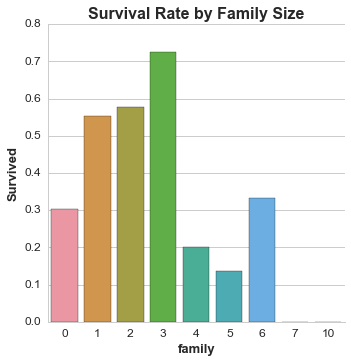

In [33]:
sns.factorplot(x='family', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Family Size')

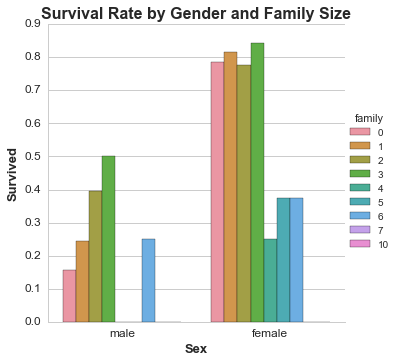

In [34]:
sns.factorplot(x='Sex', y='Survived', data=df, kind='bar', size=5, ci=None, hue='family')
plt.title('Survival Rate by Gender and Family Size')

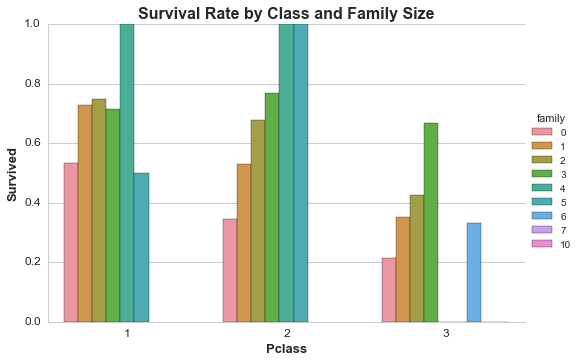

In [35]:
sns.factorplot(x='Pclass', y='Survived', data=df, kind='bar', size=5, aspect=1.5, ci=None, hue='family')
plt.title('Survival Rate by Class and Family Size')

In [36]:
df.pivot_table('Survived', index=['Sex', 'Pclass'], columns=['family'], margins=True)

family                0         1         2         3    4         5  \
Sex    Pclass                                                          
female 1       0.970588  1.000000  1.000000  0.500000  1.0  1.000000   
       2       0.906250  0.894737  0.928571  1.000000  1.0  1.000000   
       3       0.616667  0.517241  0.545455  0.833333  0.0  0.000000   
male   1       0.333333  0.387097  0.454545  1.000000  NaN  0.000000   
       2       0.097222  0.066667  0.470588  0.250000  NaN       NaN   
       3       0.121212  0.178571  0.320000  0.333333  0.0  0.000000   
All            0.303538  0.552795  0.578431  0.724138  0.2  0.136364   

family                6    7   10       All  
Sex    Pclass                                
female 1            NaN  NaN  NaN  0.968085  
       2            NaN  NaN  NaN  0.921053  
       3       0.375000  0.0  0.0  0.500000  
male   1            NaN  NaN  NaN  0.368852  
       2            NaN  NaN  NaN  0.157407  
       3       0.250000  0.0  0.0  0.135447  
All            0.333333  0.0  0.0  0.383838

### Embarkment

- S - Southampton
- C - Cherbourg
- Q - Queenstown

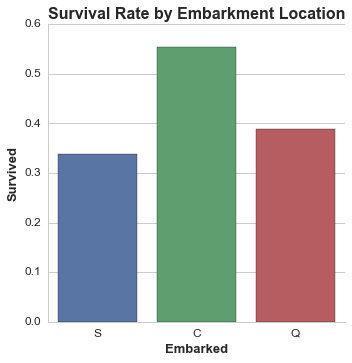

In [37]:
sns.factorplot(x='Embarked', y='Survived', data=df, kind='bar', size=5, ci=None)
plt.title('Survival Rate by Embarkment Location')

Why Cherbourg has higher survival rate? Let's explore passengers' gender and class for each embarkment location:

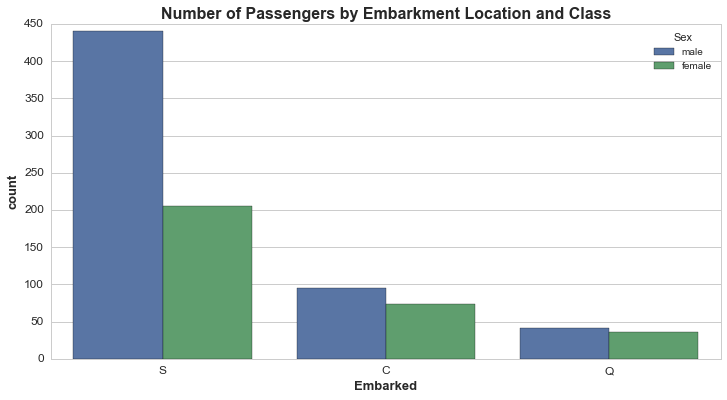

In [38]:
sns.countplot(x='Embarked', hue='Sex', data=df)
plt.title('Number of Passengers by Embarkment Location and Class')

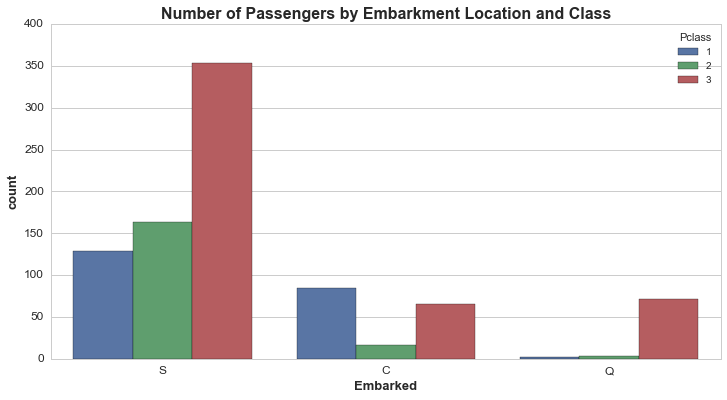

In [39]:
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.title('Number of Passengers by Embarkment Location and Class')

Passengers from Southampton were mostly male and mostly travelled in 3rd class, and we've seen earlier males in general had much lower survival rate than females.  
Majority of passengers from Queenstown were 3rd class passengers, and we've seen earlier that 3rd class passengers had lower survival rate than passengers in first two classes.

Passengers from Cherbourg had better both gender and class split, increasing their survival rates.

### Survival rate by title

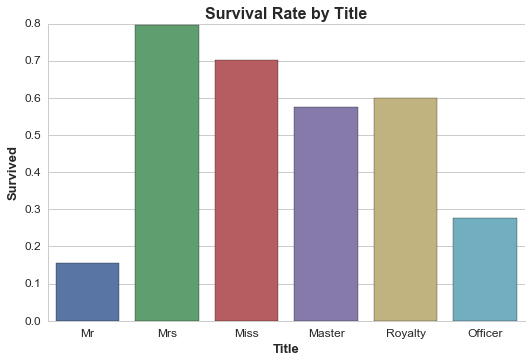

In [40]:
sns.factorplot(x='Title', y='Survived', data=df, kind='bar', size=5, aspect=1.5, ci=None)
plt.title('Survival Rate by Title')

### Survival rate by fare

[None, (1.0, 1000.0)]

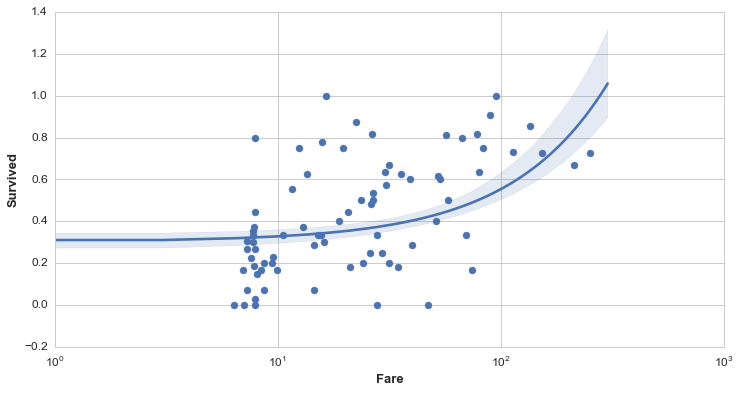

In [41]:
ax = sns.regplot(x='Fare', y='Survived', data=df, x_bins=100, x_ci=None)
ax.set(xscale="log", xlim=(1e0, 1e3))

The more you pay, the higher the chances. Probably has to do with different prices for different classes:

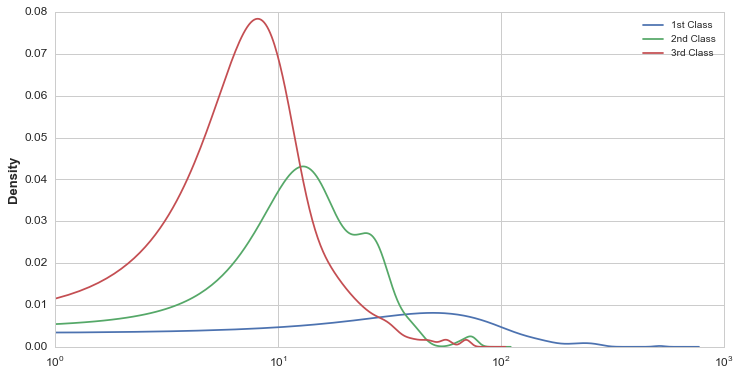

In [42]:
for pclass in [1, 2, 3]:
    ax = df[df['Pclass'] == pclass]['Fare'].plot.kde()
ax.set(xscale="log", xlim=(1e0, 1e3))
plt.legend(('1st Class', '2nd Class', '3rd Class'))